Task 1: Data Cleaning & Preprocessing

Objective: Learn how to clean and prepare raw data for ML.

Tools: Python, Pandas, NumPy, Matplotlib/Seaborn


## 1.Import the dataset and explore basic info

In [30]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv('Titanic-Dataset.csv')

In [32]:
# Let's understand the data, how it look like.
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
# Let's understand the type of values in each column of our dataframe 'df'.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [34]:
# check for duplicate entries
print(df.duplicated().sum())

0


In [35]:
# check for null entries
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


## Handle missing values using mean/median/imputation.

In [36]:
# Fill missing 'Age' with median
df['Age'].fillna(df['Age'].median(), inplace=True)

/tmp/ipython-input-1672961352.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)


In [37]:
# Fill missing 'Embarked' with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

/tmp/ipython-input-3012200906.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [38]:
# Drop 'Cabin' due to too many missing values
df.drop(columns='Cabin', inplace=True)

In [39]:
# check for null entries
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


## Convert categorical features into numerical using encoding.


In [40]:
# Convert 'Sex' and 'Embarked' into numeric using one-hot encoding
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Sex_male     891 non-null    bool   
 10  Embarked_Q   891 non-null    bool   
 11  Embarked_S   891 non-null    bool   
dtypes: bool(3), float64(2), int64(5), object(2)
memory usage: 65.4+ KB


## Normalize/standardize the numerical features

In [42]:
from sklearn.preprocessing import StandardScaler
# Select numerical columns to scale
num_cols = ['Age', 'Fare', 'SibSp', 'Parch']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

## Visualize outliers using boxplots and remove them

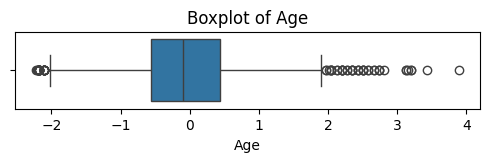

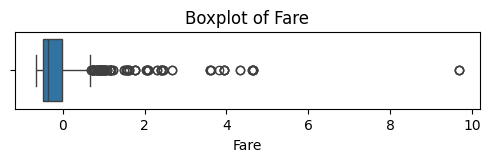

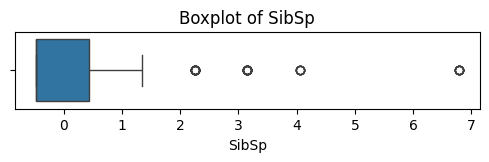

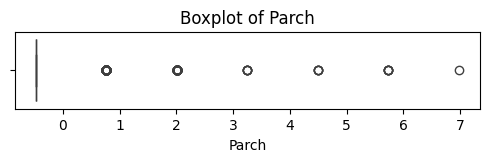

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplots to visualize outliers
for col in num_cols:
    plt.figure(figsize=(6, 1))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


In [44]:
# Remove outliers using IQR method
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]

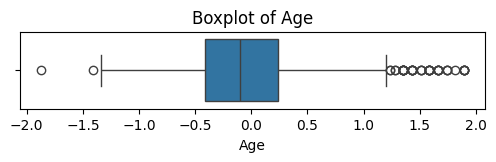

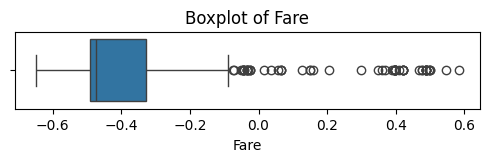

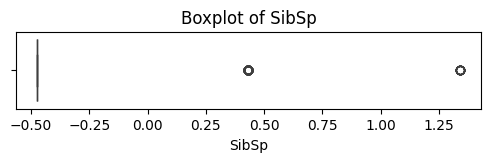

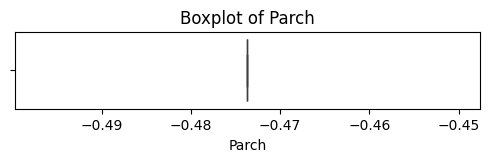

In [45]:
# Boxplots to visualize outliers
for col in num_cols:
    plt.figure(figsize=(6, 1))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()